In [ ]:
!unzip "/content/covid-19.zip"

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [69]:
#data
import os

test_covid_dir = '/content/Covid19-dataset/test/Covid'
test_normal_dir = '/content/Covid19-dataset/test/Normal'
test_viral_dir = '/content/Covid19-dataset/test/Viral Pneumonia'

train_covid_dir = '/content/Covid19-dataset/train/Covid'
train_normal_dir = '/content/Covid19-dataset/train/Normal'
train_viral_dir = '/content/Covid19-dataset/train/Viral Pneumonia'

In [70]:
print('total train covid images:', len(os.listdir(train_covid_dir)))
print('total train normal images:', len(os.listdir(train_normal_dir)))
print('total train viral images:', len(os.listdir(train_viral_dir)))
print('total test covid images:', len(os.listdir(test_covid_dir)))
print('total test normal images:', len(os.listdir(test_normal_dir)))
print('total test viral images:', len(os.listdir(test_viral_dir)))

total train covid images: 111
total train normal images: 70
total train viral images: 70
total test covid images: 26
total test normal images: 20
total test viral images: 20


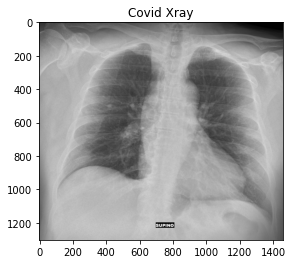

In [124]:
img = image.load_img("/content/Covid19-dataset/train/Covid/010.png")
plt.title("Covid Xray")
plt.imshow(img)
plt.show()

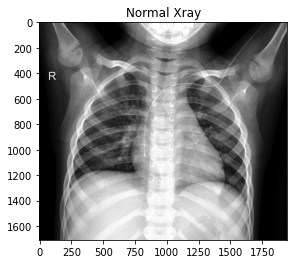

In [126]:
img2 = image.load_img("/content/Covid19-dataset/train/Normal/01.jpeg")
plt.title("Normal Xray")
plt.imshow(img2)
plt.show()

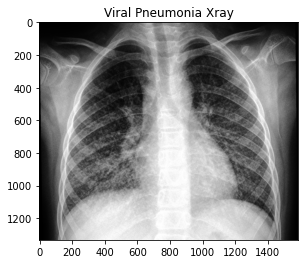

In [125]:
img3 = image.load_img("/content/Covid19-dataset/train/Viral Pneumonia/01.jpeg")
plt.title("Viral Pneumonia Xray")
plt.imshow(img3)
plt.show()

In [88]:
train_dir = '/content/Covid19-dataset/train'
test_dir = '/content/Covid19-dataset/test'

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(380, 380),
                                                    batch_size=16,
                                                    class_mode='categorical') #categorical 

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(380, 380),
                                                  batch_size=16,
                                                  class_mode='categorical')

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [106]:
model = Sequential()
model.add(Conv2D(256, (3, 3), activation='relu',input_shape=(380, 380,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [107]:
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
model.fit_generator(train_generator,epochs=14)

Epoch 1/14
16/16 [==============================] - 12s 691ms/step - loss: 1.1781 - accuracy: 0.4064
Epoch 2/14
16/16 [==============================] - 12s 709ms/step - loss: 0.9047 - accuracy: 0.5896
Epoch 3/14
16/16 [==============================] - 12s 713ms/step - loss: 0.5832 - accuracy: 0.8088
Epoch 4/14
16/16 [==============================] - 12s 709ms/step - loss: 0.4169 - accuracy: 0.8566
Epoch 5/14
16/16 [==============================] - 12s 722ms/step - loss: 0.2840 - accuracy: 0.8805
Epoch 6/14
16/16 [==============================] - 12s 723ms/step - loss: 0.2678 - accuracy: 0.9084
Epoch 7/14
16/16 [==============================] - 13s 774ms/step - loss: 0.1848 - accuracy: 0.9363
Epoch 8/14
16/16 [==============================] - 12s 691ms/step - loss: 0.1386 - accuracy: 0.9402
Epoch 9/14
16/16 [==============================] - 12s 698ms/step - loss: 0.1773 - accuracy: 0.9363
Epoch 10/14
16/16 [==============================] - 12s 733ms/step - loss: 0.1031 - accura

In [109]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(test_loss)
print(test_accuracy)

5/5 [==============================] - 2s 293ms/step - loss: 0.3401 - accuracy: 0.9545
0.3401317596435547
0.9545454382896423
